In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
df_path = 'loan_approval-3/loan_approval_dataset.csv'
df = pd.read_csv(df_path)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Removing unwanted spaces from columns

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Introducing new Columns as dataset is small

In [6]:
df['amount_by_income'] = df['loan_amount']/df['income_annum']
# df['amount_by_term'] = df['loan_amount']/df['loan_term']  # Bad feature (Favours Risky Loans)
# df['debt_burden_ratio'] = (df['loan_amount']/(df['loan_term']*12))/ (df['income_annum']/12)
# df['risk_ratio'] = df['loan_amount']/ (df['income_annum']/ 12 * df['loan_term'])
df['risk_score'] = -np.log(df['loan_amount'] / (df['income_annum']/12 * df['loan_term']))
df['mean_asset_value'] = (df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value'])/4

### Renaming column name

In [7]:
df['credit_score'] = df['cibil_score']
df.drop(columns=['cibil_score'], axis=1, inplace=True)

### Formating Loan Status into Binary Form

In [8]:
df['loan_status'] = np.where(df['loan_status'] == ' Approved', 1, 0)

### Removing Unwanted Columns

In [9]:
df.drop(columns=['loan_id'], axis=1, inplace=True)

In [10]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,amount_by_income,risk_score,mean_asset_value,credit_score
0,2,Graduate,No,9600000,29900000,12,2400000,17600000,22700000,8000000,1,3.114583,-1.136095,12675000.0,778
1,0,Not Graduate,Yes,4100000,12200000,8,2700000,2200000,8800000,3300000,0,2.975610,-1.495914,4250000.0,417
2,3,Graduate,No,9100000,29700000,20,7100000,4500000,33300000,12800000,0,3.263736,-0.672047,14425000.0,506
3,3,Graduate,No,8200000,30700000,8,18200000,3300000,23300000,7900000,0,3.743902,-1.725594,13175000.0,467
4,5,Not Graduate,Yes,9800000,24200000,20,12400000,8200000,29400000,5000000,0,2.469388,-0.393145,13750000.0,382


### Dividing dataset into two parts 
#### Input and Target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   residential_assets_value  4269 non-null   int64  
 7   commercial_assets_value   4269 non-null   int64  
 8   luxury_assets_value       4269 non-null   int64  
 9   bank_asset_value          4269 non-null   int64  
 10  loan_status               4269 non-null   int64  
 11  amount_by_income          4269 non-null   float64
 12  risk_score                4269 non-null   float64
 13  mean_asset_value          4269 non-null   float64
 14  credit_s

### Examining Every Feature

In [12]:
def histplot(col, df=df, x_val=4, y_val=4, bins=30):
    plt.figure(figsize=(x_val, y_val))
    sns.histplot(data=df, x=col, kde=True, bins=bins)
    col_name = ' '.join(col.split('_')) if '_' in col else col
    plt.title(col_name.title() + ' Comparision')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

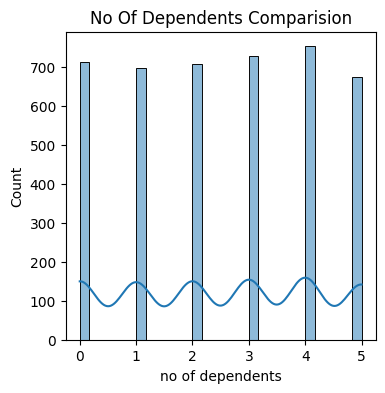

In [86]:
histplot('no_of_dependents')

In [87]:
def pie_chart(col, df=df, x_val=4, y_val=4, bins=30):
    col_info = df[col].value_counts()
    plt.figure(figsize=(x_val, y_val))
    plt.pie(col_info.values, labels=col_info.index, startangle=90)
    
    col_name = ' '.join(col.split('_')) if '_' in col else col
    plt.title(col_name.title() + ' Comparision')
    plt.xlabel(col_name)
    plt.show()    
    print(np.unique(df[col], return_counts=True))

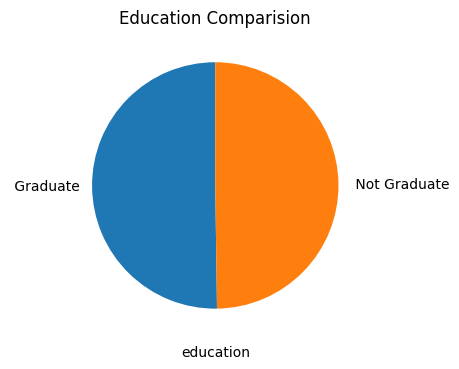

(array([' Graduate', ' Not Graduate'], dtype=object), array([2144, 2125]))


In [16]:
pie_chart('education')

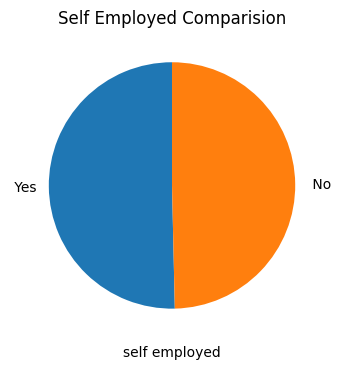

(array([' No', ' Yes'], dtype=object), array([2119, 2150]))


In [17]:
pie_chart('self_employed')

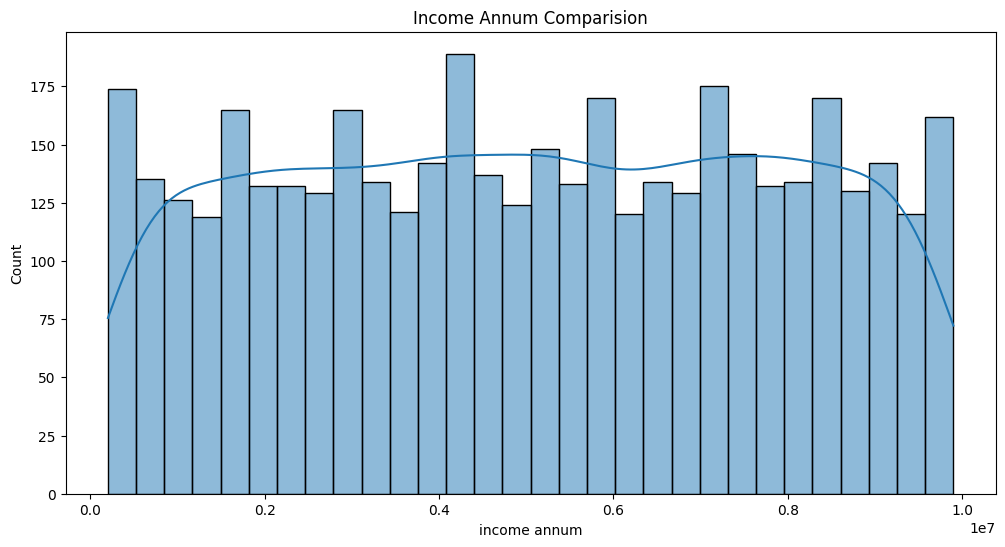

In [19]:
histplot('income_annum', x_val=12, y_val=6)

In [20]:
print(df['income_annum'].describe())

count    4.269000e+03
mean     5.059124e+06
std      2.806840e+06
min      2.000000e+05
25%      2.700000e+06
50%      5.100000e+06
75%      7.500000e+06
max      9.900000e+06
Name: income_annum, dtype: float64


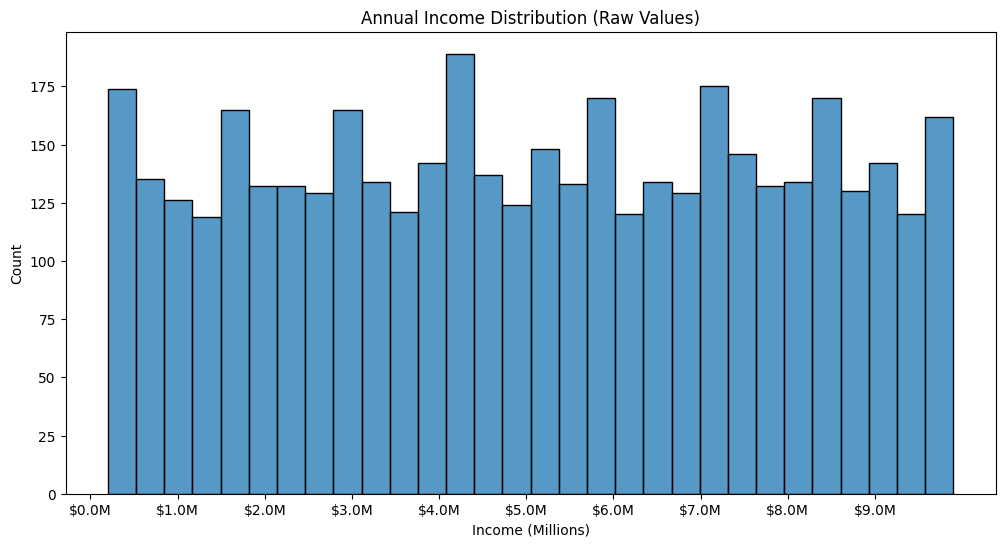

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='income_annum', bins=30)
plt.title('Annual Income Distribution (Raw Values)')
plt.xlabel('Income (Millions)')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 10e6, 1e6), 
           labels=[f"${x/1e6:.1f}M" for x in np.arange(0, 10e6, 1e6)])
plt.show()

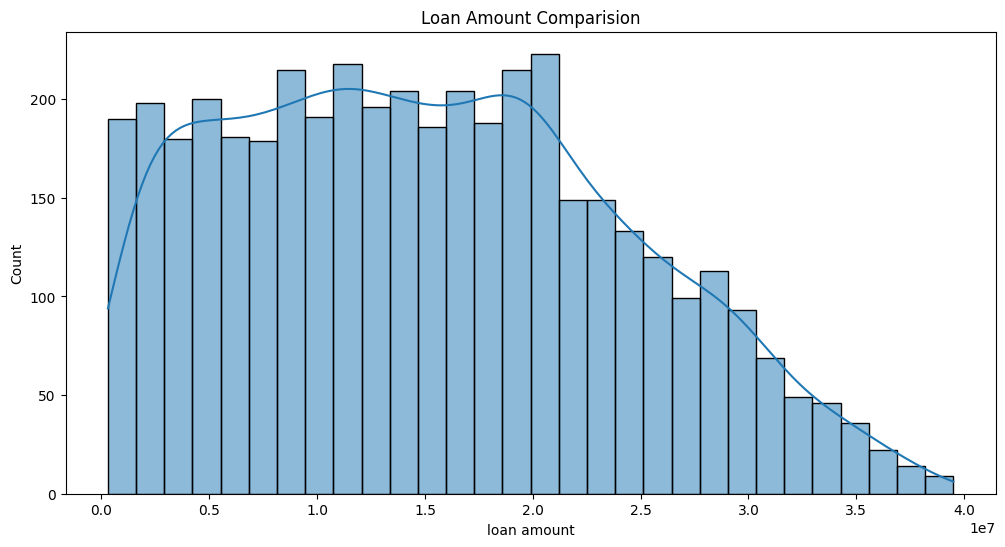

In [22]:
histplot('loan_amount', x_val=12, y_val=6)

In [23]:
print(df['loan_amount'].describe())

count    4.269000e+03
mean     1.513345e+07
std      9.043363e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.150000e+07
max      3.950000e+07
Name: loan_amount, dtype: float64


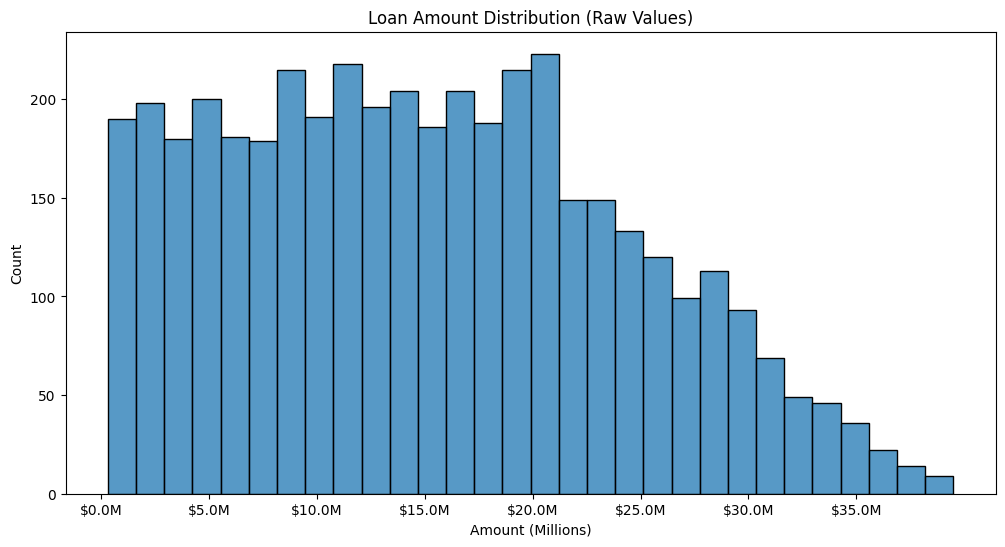

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='loan_amount', bins=30)
plt.title('Loan Amount Distribution (Raw Values)')
plt.xlabel('Amount (Millions)')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 40e6, 5e6), 
           labels=[f"${x/1e6:.1f}M" for x in np.arange(0, 40e6, 5e6)])
plt.show()

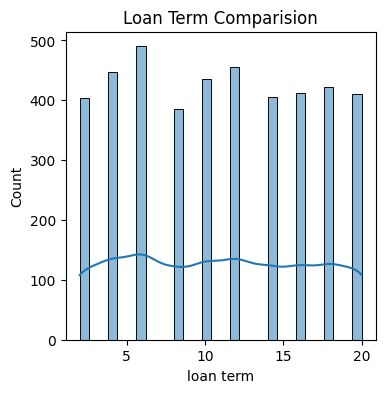

In [25]:
histplot('loan_term')

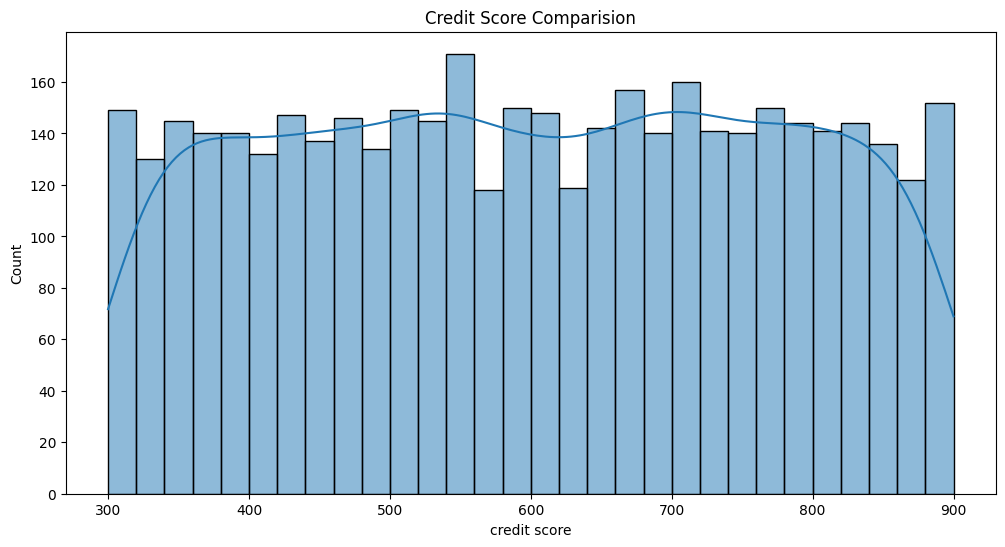

In [26]:
histplot('credit_score', x_val=12, y_val=6)

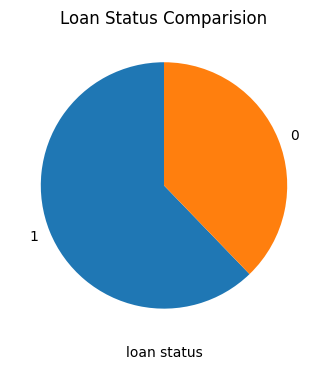

(array([0, 1]), array([1613, 2656]))


In [27]:
pie_chart('loan_status')

### Observing which feature is more dependent for target(Loan Status)

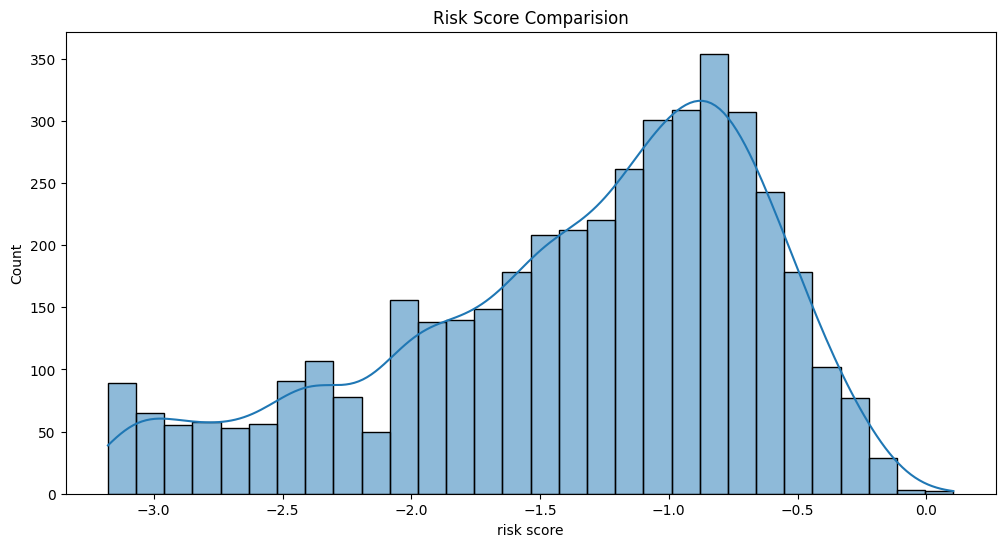

In [103]:
histplot('risk_score', x_val=12, y_val=6)

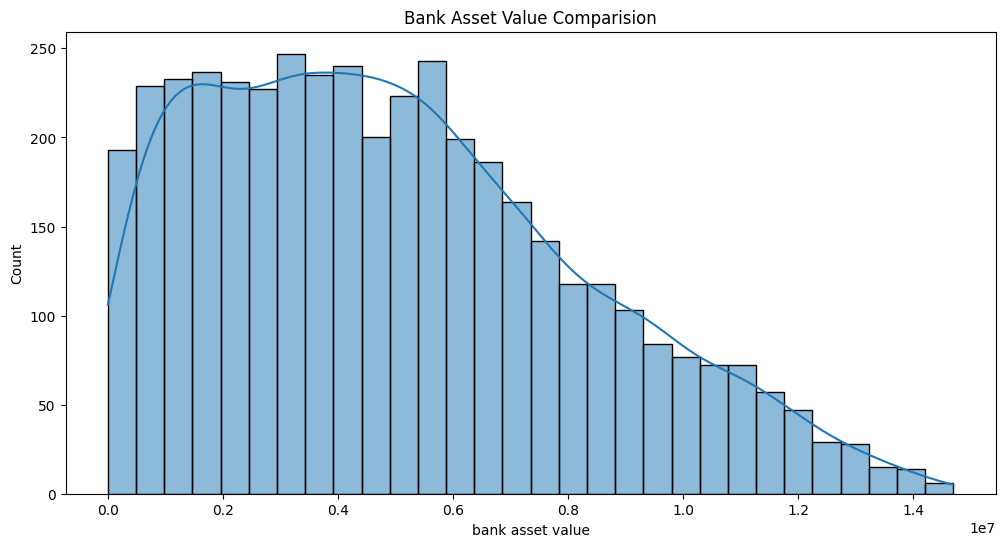

count    4.269000e+03
mean     4.976692e+06
std      3.250185e+06
min      0.000000e+00
25%      2.300000e+06
50%      4.600000e+06
75%      7.100000e+06
max      1.470000e+07
Name: bank_asset_value, dtype: float64


In [14]:
histplot('bank_asset_value', x_val=12, y_val=6)
print(df['bank_asset_value'].describe())

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   residential_assets_value  4269 non-null   int64  
 7   commercial_assets_value   4269 non-null   int64  
 8   luxury_assets_value       4269 non-null   int64  
 9   bank_asset_value          4269 non-null   int64  
 10  loan_status               4269 non-null   int64  
 11  amount_by_income          4269 non-null   float64
 12  risk_score                4269 non-null   float64
 13  mean_asset_value          4269 non-null   float64
 14  credit_s

In [105]:
np.unique(df['no_of_dependents'], return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([712, 697, 708, 727, 752, 673]))

In [33]:
df.groupby('loan_status')['no_of_dependents'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,2.538128,1.696754,0.0,1.0,3.0,4.0,5.0
1,2656.0,2.474774,1.695270,0.0,1.0,2.5,4.0,5.0


In [34]:
df.groupby('loan_status')['education'].describe()

,count,unique,top,freq
loan_status,,,,
0,1613,2,Not Graduate,808
1,2656,2,Graduate,1339


In [35]:
df.groupby('loan_status')['self_employed'].describe()

,count,unique,top,freq
loan_status,,,,
0,1613,2,Yes,812
1,2656,2,Yes,1338


In [36]:
df.groupby('loan_status')['income_annum'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,5.113825e+06,2.772946e+06,200000.0,2800000.0,5100000.0,7500000.0,9900000.0
1,2656.0,5.025904e+06,2.827228e+06,200000.0,2600000.0,5000000.0,7500000.0,9900000.0


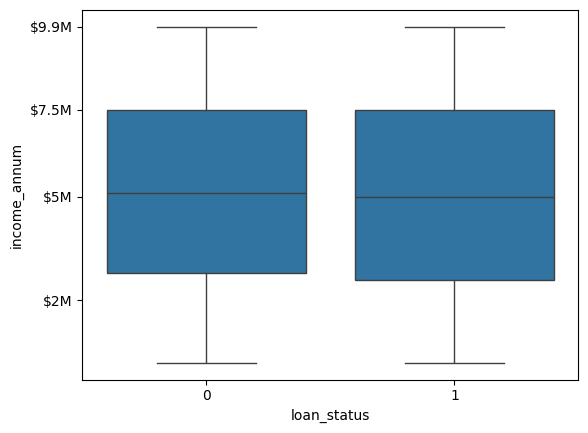

In [37]:
sns.boxplot(data=df, x='loan_status', y='income_annum')  
plt.yticks([2e6, 5e6, 7.5e6, 9.9e6], ["$2M", "$5M", "$7.5M", "$9.9M"])  
plt.show()  

In [38]:
df.groupby('loan_status')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,1.494606e+07,8.741390e+06,300000.0,7900000.0,14500000.0,20800000.0,38200000.0
1,2656.0,1.524725e+07,9.221696e+06,300000.0,7500000.0,14600000.0,22100000.0,39500000.0


In [39]:
df.groupby('loan_status')['loan_term'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,11.728456,5.316127,2.0,8.0,12.0,16.0,20.0
1,2656.0,10.397590,5.879523,2.0,4.0,10.0,16.0,20.0


In [40]:
df.groupby('loan_status')['credit_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,429.468072,78.401752,300.0,364.0,429.0,493.0,885.0
1,2656.0,703.461973,125.249016,300.0,618.0,711.0,803.0,900.0


In [41]:
df.groupby('loan_status')['mean_asset_value'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,8.207781e+06,4.824069e+06,100000.0,4300000.0,7975000.0,11925000.0,21775000.0
1,2656.0,8.094324e+06,4.908702e+06,175000.0,3943750.0,7750000.0,11737500.0,22675000.0


In [42]:
df.groupby('loan_status')['amount_by_income'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,2.917779,0.594736,1.5,2.411765,2.875000,3.428571,4.0
1,2656.0,3.025512,0.592377,1.5,2.513074,3.049691,3.544591,4.0


In [106]:
# df['risk_score'] = -np.log(df['loan_amount'] / (df['income_annum']/12 * df['loan_term']))

In [146]:
df.groupby('loan_status')['risk_score'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,-1.213974,0.589037,-3.123987,-1.566749,-1.098612,-0.774588,0.105361
1,2656.0,-1.449600,0.770712,-3.178054,-2.001256,-1.253334,-0.838096,-0.105361


In [15]:
df.groupby('loan_status')['bank_asset_value'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1613.0,5.004960e+06,3.211871e+06,0.0,2400000.0,4600000.0,7000000.0,14700000.0
1,2656.0,4.959526e+06,3.273718e+06,0.0,2300000.0,4500000.0,7200000.0,14700000.0


In [147]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,amount_by_income,risk_score,mean_asset_value,credit_score
0,2,Graduate,No,9600000,29900000,12,2400000,17600000,22700000,8000000,1,3.114583,-1.136095,12675000.0,778
1,0,Not Graduate,Yes,4100000,12200000,8,2700000,2200000,8800000,3300000,0,2.975610,-1.495914,4250000.0,417
2,3,Graduate,No,9100000,29700000,20,7100000,4500000,33300000,12800000,0,3.263736,-0.672047,14425000.0,506
3,3,Graduate,No,8200000,30700000,8,18200000,3300000,23300000,7900000,0,3.743902,-1.725594,13175000.0,467
4,5,Not Graduate,Yes,9800000,24200000,20,12400000,8200000,29400000,5000000,0,2.469388,-0.393145,13750000.0,382


### Dividing Dataset into Feature and Target Varaibles
#### X and Y

In [16]:
X_cols = [cols for cols in df.columns if cols != 'loan_status']
Y_col = 'loan_status'

X = df[X_cols]
Y = df[Y_col]
# X_cols = [col for col in df.columns if col != 'loan_status']
# y_col = 'loan_status'

# X = df[X_cols]
# y = df[y_col]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   residential_assets_value  4269 non-null   int64  
 7   commercial_assets_value   4269 non-null   int64  
 8   luxury_assets_value       4269 non-null   int64  
 9   bank_asset_value          4269 non-null   int64  
 10  loan_status               4269 non-null   int64  
 11  amount_by_income          4269 non-null   float64
 12  risk_score                4269 non-null   float64
 13  mean_asset_value          4269 non-null   float64
 14  credit_s

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4269 non-null   int64  
 1   education                 4269 non-null   object 
 2   self_employed             4269 non-null   object 
 3   income_annum              4269 non-null   int64  
 4   loan_amount               4269 non-null   int64  
 5   loan_term                 4269 non-null   int64  
 6   residential_assets_value  4269 non-null   int64  
 7   commercial_assets_value   4269 non-null   int64  
 8   luxury_assets_value       4269 non-null   int64  
 9   bank_asset_value          4269 non-null   int64  
 10  amount_by_income          4269 non-null   float64
 11  risk_score                4269 non-null   float64
 12  mean_asset_value          4269 non-null   float64
 13  credit_score              4269 non-null   int64  
dtypes: float

In [152]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name: loan_status
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB


### Splitting dataset into two parts 
#### Train and Test

In [153]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2025, stratify=Y)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3415, 14) (3415,)
(854, 14) (854,)


### Normalizing our dataset
#### Standard Scalar for Int and Float Values
#### OneHot Coding for Object/Categorical Values

In [155]:
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [201]:
object_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), object_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ]
)

print(object_cols)
print(numeric_cols)

Index(['education', 'self_employed'], dtype='object')
Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'amount_by_income',
       'risk_score', 'mean_asset_value', 'credit_score'],
      dtype='object')


In [202]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print(type(X_train))
print(type(X_train_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [205]:
from xgboost import XGBClassifier

# as our data is slightly imbalance we will use scale pos weight value
positive_count = (y_train == 1).sum()
negative_count = (y_train == 0).sum()

print(positive_count)
print(negative_count)
scale_pos_weight = positive_count/negative_count
print(scale_pos_weight)

xgb_model = XGBClassifier(objective='binary:logistic', 
                         eval_metric='auc',
                         random_state=2025, 
                        scale_pos_weight=scale_pos_weight,
                         )
xgb_model.fit(X_train_scaled, y_train, 
             eval_set=[(X_val_scaled, y_val)],
             verbose=True, 
             )

2125
1290
1.6472868217054264
[0]	validation_0-auc:1.00000
[1]	validation_0-auc:1.00000
[2]	validation_0-auc:1.00000
[3]	validation_0-auc:1.00000
[4]	validation_0-auc:1.00000
[5]	validation_0-auc:1.00000
[6]	validation_0-auc:1.00000
[7]	validation_0-auc:1.00000
[8]	validation_0-auc:1.00000
[9]	validation_0-auc:1.00000
[10]	validation_0-auc:1.00000
[11]	validation_0-auc:1.00000
[12]	validation_0-auc:1.00000
[13]	validation_0-auc:1.00000
[14]	validation_0-auc:1.00000
[15]	validation_0-auc:1.00000
[16]	validation_0-auc:1.00000
[17]	validation_0-auc:1.00000
[18]	validation_0-auc:1.00000
[19]	validation_0-auc:1.00000
[20]	validation_0-auc:1.00000
[21]	validation_0-auc:1.00000
[22]	validation_0-auc:1.00000
[23]	validation_0-auc:1.00000
[24]	validation_0-auc:1.00000
[25]	validation_0-auc:1.00000
[26]	validation_0-auc:1.00000
[27]	validation_0-auc:1.00000
[28]	validation_0-auc:1.00000
[29]	validation_0-auc:1.00000
[30]	validation_0-auc:1.00000
[31]	validation_0-auc:1.00000
[32]	validation_0-auc

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [206]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

### Checking metric value to see if model Overfits/ Underfits

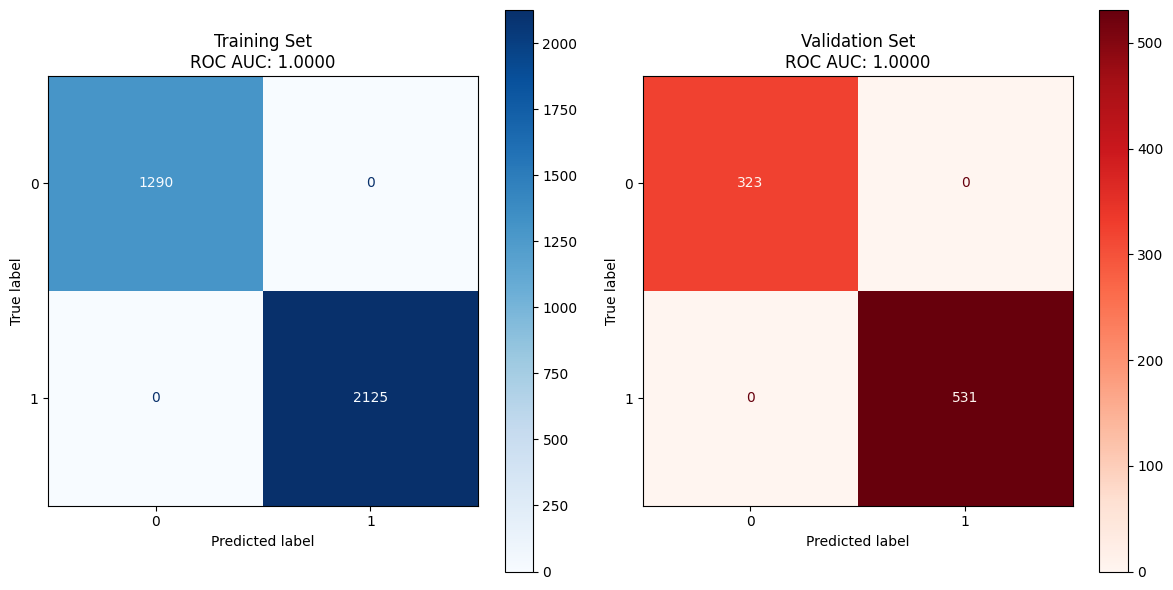

In [207]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay


y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_val = xgb_model.predict(X_val_scaled)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_val = confusion_matrix(y_val, y_pred_val)

y_proba_train = xgb_model.predict_proba(X_train_scaled)[:, 1]
y_proba_val = xgb_model.predict_proba(X_val_scaled)[:, 1]

roc_auc_train = roc_auc_score(y_train, y_proba_train)
roc_auc_val = roc_auc_score(y_val, y_proba_val)

# plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
# disp_train = ConfusionMatrixDisplay(cm_train)
# disp_train.plot()

# plt.subplot(1,2,2)
# disp_val = ConfusionMatrixDisplay(cm_val)
# disp_val.plot()

# print(roc_auc_train)
# print(roc_auc_val)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
disp_train = ConfusionMatrixDisplay(cm_train)
disp_train.plot(ax=ax1, cmap='Blues')
ax1.set_title(f'Training Set\nROC AUC: {roc_auc_train:.4f}')

disp_val = ConfusionMatrixDisplay(cm_val)
disp_val.plot(ax=ax2, cmap='Reds')
ax2.set_title(f'Validation Set\nROC AUC: {roc_auc_val:.4f}')

plt.tight_layout()
plt.show()

In [208]:
print(y_train.value_counts(), y_val.value_counts())

loan_status
1    2125
0    1290
Name: count, dtype: int64 loan_status
1    531
0    323
Name: count, dtype: int64


In [209]:
print("Min positive prob on positives:", np.min(y_proba_val[y_val==1]))
print("Max positive prob on negatives:", np.max(y_proba_val[y_val==0]))

Min positive prob on positives: 0.68433124
Max positive prob on negatives: 0.009128587


In [210]:
# grab the feature names after One‑Hot + scaling
feat_names = preprocessor.get_feature_names_out()

# get importances from the trained model
imps = xgb_model.feature_importances_

# tabulate and sort
fi = pd.Series(imps, index=feat_names).sort_values(ascending=False)
print(fi.head(10))

scaler__credit_score                0.687677
scaler__risk_score                  0.184120
scaler__amount_by_income            0.063798
scaler__luxury_assets_value         0.009699
scaler__residential_assets_value    0.009381
scaler__no_of_dependents            0.007209
scaler__mean_asset_value            0.006847
scaler__commercial_assets_value     0.006715
scaler__loan_amount                 0.006387
ohe__self_employed_ No              0.005550
dtype: float32


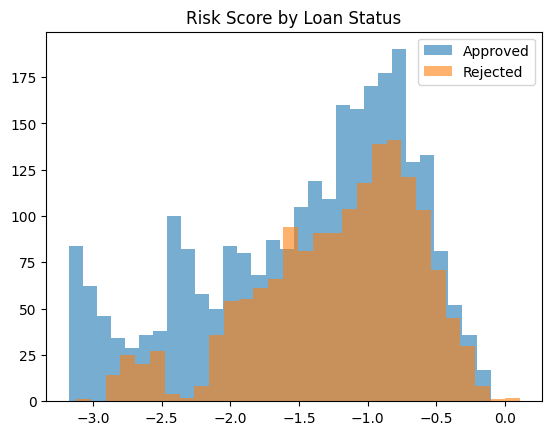

In [211]:
import matplotlib.pyplot as plt

plt.hist(df.loc[df.loan_status==1, 'risk_score'], bins=30, alpha=0.6, label='Approved')
plt.hist(df.loc[df.loan_status==0, 'risk_score'], bins=30, alpha=0.6, label='Rejected')
plt.legend()
plt.title("Risk Score by Loan Status")
plt.show()


             min  max        mean
loan_status                      
0            300  885  429.468072
1            300  900  703.461973


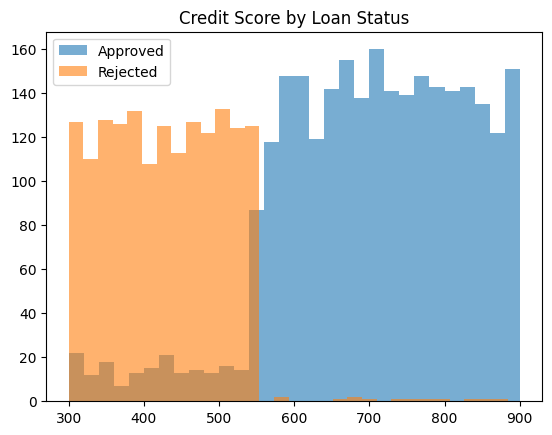

In [212]:
# Summary stats
print(df.groupby('loan_status')['credit_score'].agg(['min','max','mean']))

# Visual check
import matplotlib.pyplot as plt
plt.hist(df.loc[df.loan_status==1, 'credit_score'], bins=30, alpha=0.6, label='Approved')
plt.hist(df.loc[df.loan_status==0, 'credit_score'], bins=30, alpha=0.6, label='Rejected')
plt.legend()
plt.title("Credit Score by Loan Status")
plt.show()


In [1]:
X_train.columns

NameError: name 'X_train' is not defined